# Implementing Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating Dataset
from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=3)

In [4]:
print(x.shape,y.shape)

(500, 2) (500,)


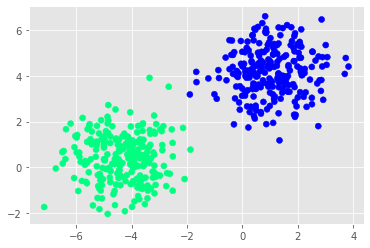

In [5]:
plt.style.use('ggplot')
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.winter)
plt.show()

# Description of data created:

no of samples - 500

no of features (classes) - 2 : 0 and 1 : labels

# Model Creation

In [6]:
def activation(z):
    return (1.0)/(1+np.exp(-z))

In [7]:
def cal_process_output(wt,x_data):
    z=np.dot(x_data,wt)
    sig_z = activation(z)
    return sig_z

In [8]:
def cal_loss(x,y,wt):
    #Binary Cross entropy : Log Loss
    y_hat = cal_process_output(wt,x)
    LL = np.mean(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))
    return LL

In [9]:
def update_values(x,y,wt,lr):
    y_hat=cal_process_output(wt,x)
    prod = np.dot(x.T,y_hat-y)
    no = x.shape[0]
    wt = wt - lr*prod/float(no)
    return wt

In [10]:
def train(x,y,lr=0.5,epoch=100):
    # add a x0 column to handle bias where bias is always 1
    ones = np.ones((x.shape[0],1))
    x=np.hstack((ones,x))
    
    wt = np.zeros(x.shape[1])
    
    for e in range(epoch):
        wt =update_values(x,y,wt,lr)
        if e%100==0:
            cur_l = cal_loss(x,y,wt)
            print("Loss at epoch ",e," is: ",cur_l)
    return wt

In [11]:
w=train(x,y,epoch=100)

Loss at epoch  0  is:  0.08983909461865412


In [12]:
w

array([-0.03978899, -1.81268085, -1.25153381])

# Make Predictions

In [13]:
def get_all_pred(x_test,wt,out=True):
    if(x_test.shape[1]!=wt.shape[0]):
        temp=np.ones((x_test.shape[0],1))
        x_test=np.hstack((temp,x_test))
    prob = cal_process_output(wt,x_test)
    if not out:
        return prob
    else:
        out = np.zeros(prob.shape)
        out[prob>=5]=1
        return out

# Visualization

In [14]:
x1=np.linspace(-4,2,10)
x2= -(w[0]+w[1]*x1)/w[2]

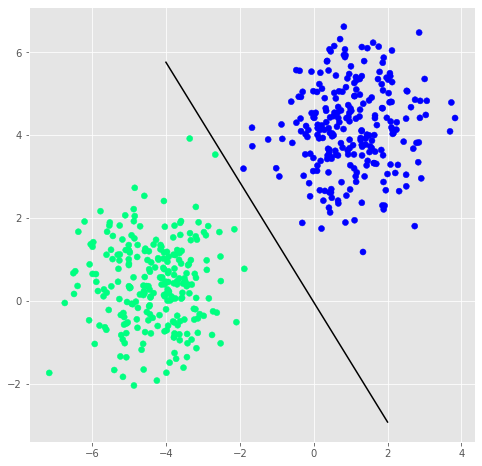

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.winter)
plt.plot(x1,x2,color="black")
plt.show()

# Find Accuracy

In [16]:
y_hat = get_all_pred(x,w)

In [17]:
np.sum(y_hat==y)/y.shape[0] * 100

50.0